# Sales Analysis

## Installing frameworks 

In [1]:
%pip install pandas matplotlib numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


---
<a id='import'></a>
## 1. Importing necessary libraries

In [2]:
# import libraries
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<h2> 2. Processing Dataset 2023-24 </h2>

In [3]:
# 1. Load Data
df = pd.read_csv('./data/TechTrend_dataset_24.csv')

# 2. RENAME COLUMNS (Mapping your specific columns to standard names)
# Note: We are fixing 'Product ' (removing the space) and mapping 'Customer ID' to 'order_id'
df = df.rename(columns={
    'Product ': 'product',  
    'Order Date': 'order_date',
    'Price Each': 'price_each',
    'Quantity Ordered': 'quantity_ordered',
    'Customer ID': 'order_id',   # Using Customer ID as the unique identifier
    'Payment Method': 'payment_method',
    'Gender': 'gender',
    'Loyalty Member': 'loyalty_member',
    'Shipping Type': 'shipping_type'
})

# 3. Drop rows with missing values
df = df.dropna(how='any')

# 4. Fix Data Types
df['order_date'] = pd.to_datetime(df['order_date'])
df['quantity_ordered'] = pd.to_numeric(df['quantity_ordered'], errors='coerce')
df['price_each'] = pd.to_numeric(df['price_each'], errors='coerce')

# 5. Feature Engineering (Creating new columns)

# Create SALES Column (Revenue)
df['total_sales'] = df['quantity_ordered'] * df['price_each']

# Create MONTH Column
df['month'] = df['order_date'].dt.month_name()

# Create HOUR Column
df['hour'] = df['order_date'].dt.hour

# --- SUCESS MESSAGE ---
print("✅ Data Loaded Successfully!")
print("Here are your new columns:")
print(list(df.columns))
display(df.head())

✅ Data Loaded Successfully!
Here are your new columns:
['order_id', 'Age', 'gender', 'loyalty_member', 'product', 'SKU', 'Rating', 'Order Status', 'payment_method', 'price_each', 'Unit Price', 'quantity_ordered', 'order_date', 'shipping_type', 'Add-ons Purchased', 'Add-on Total', 'total_sales', 'month', 'hour']


C:\Users\sriha\AppData\Local\Temp\ipykernel_33404\3351958385.py:22: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['order_date'] = pd.to_datetime(df['order_date'])


,order_id,Age,gender,loyalty_member,product,SKU,Rating,Order Status,payment_method,price_each,Unit Price,quantity_ordered,order_date,shipping_type,Add-ons Purchased,Add-on Total,total_sales,month,hour
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21,38768.31,March,0
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09,2223.27,April,0
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,12659.04,August,0
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56,83.00,May,0
5,1004,41,Female,No,Smartphone,SKU1001,5,Completed,Credit Card,83.00,20.75,4,2024-05-26,Standard,"Impulse Item,Accessory",65.78,332.00,May,0


In [4]:
df

,order_id,Age,gender,loyalty_member,product,SKU,Rating,Order Status,payment_method,price_each,Unit Price,quantity_ordered,order_date,shipping_type,Add-ons Purchased,Add-on Total,total_sales,month,hour
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21,38768.31,March,0
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09,2223.27,April,0
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,12659.04,August,0
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56,83.00,May,0
5,1004,41,Female,No,Smartphone,SKU1001,5,Completed,Credit Card,83.00,20.75,4,2024-05-26,Standard,"Impulse Item,Accessory",65.78,332.00,May,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19990,19994,64,Male,No,Tablet,TBL345,4,Cancelled,Bank Transfer,5504.87,786.41,7,2024-06-12,Expedited,"Accessory, Extended Warranty",93.17,38534.09,June,0
19992,19996,27,Female,Yes,Smartphone,SMP234,4,Cancelled,PayPal,4558.72,1139.68,4,2024-01-24,Same Day,Extended Warranty,65.94,18234.88,January,0
19993,19996,27,Female,No,Smartphone,SMP234,1,Cancelled,PayPal,7977.76,1139.68,7,2024-04-11,Expedited,"Extended Warranty, Extended Warranty, Impulse ...",167.20,55844.32,April,0
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98,9029.50,August,0


In [5]:
print(f"Total Data Shape: {df.shape}")

Total Data Shape: (15132, 19)


### Assessment Summary (2024 Dataset)

**. Data Quality Issues (Addressed):**
- **Column Names:** The raw CSV contained trailing spaces (e.g., `Product `) and inconsistent naming (`Customer ID`). These were renamed to standard snake_case (e.g., `product`, `order_id`).
- **Data Types:** `Order Date` was parsed as text, and `Quantity`/`Price` needed conversion to numeric types for calculation.
- **Missing Values:** Rows with incomplete data were identified and removed.

**. Feature Engineering:**
- **No Merging Needed:** Unlike older datasets, this 2023-2024 data came in a single comprehensive file.
- **New Metrics:** Created `total_sales` (Revenue), `month`, and `hour` columns.
- **New Dimensions:** The dataset includes valuable demographics (`Gender`, `Age`) and `Payment Method`, allowing for customer segmentation analysis.

---
<a id='analyze-visaulize'></a>
##  Analyze and Visualization

**We are trying to answer these questions:**
1. What was the best month for sales? How much was earned that month?
2. Which Payment Method brings the most revenue?
3. Which Shipping Type drives the most revenue?
4. Do Loyalty Members generate more revenue than Non-Members?
5. Which products are the best sellers?

---
### Q1: What was the best month for sales? How much was earned that month?

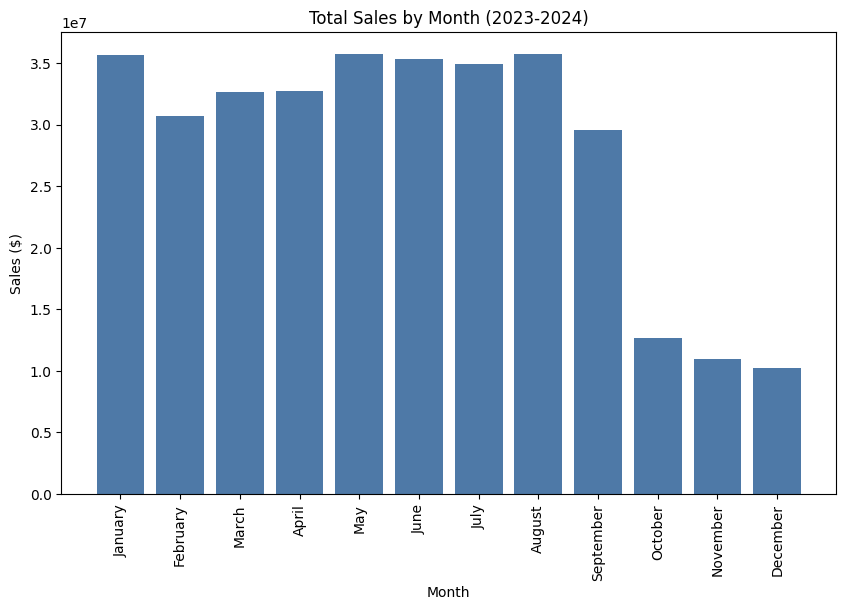

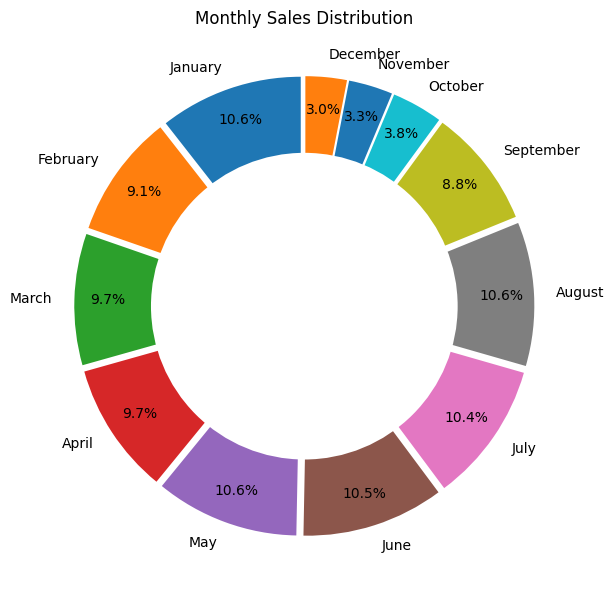

In [6]:
# Q1: What was the best month for sales?

# 1. PREPARE DATA
# numeric_only=True prevents the crash on text columns
all_months_data = df.groupby('month').sum(numeric_only=True)['total_sales']

# Force correct calendar order
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']

# Reindex ensures we have all 12 months (fills missing ones with 0)
all_months_data = all_months_data.reindex(months_order, fill_value=0)

# 2. PLOT BAR CHART
plt.figure(figsize=(10, 6))
plt.bar(all_months_data.index, all_months_data.values, color='#4e79a7')
plt.xticks(rotation='vertical')
plt.ylabel('Sales ($)')
plt.xlabel('Month')
plt.title('Total Sales by Month (2023-2024)')
plt.show()

# 3. PLOT DONUT CHART
plt.figure(figsize=(10, 6))

# Filter out months with 0 sales to make the pie chart look nice
active_months = all_months_data[all_months_data > 0]

# Dynamic explode (creates a list of 0.05 based on how many months usually exist)
explode_values = [0.05] * len(active_months)

plt.pie(active_months, labels=active_months.index, autopct='%1.1f%%', 
        startangle=90, pctdistance=0.85, explode=explode_values)

# Draw the white circle to make it a Donut
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Monthly Sales Distribution")
plt.tight_layout()
plt.show()

### Q2: Which Payment Method brings the most revenue?

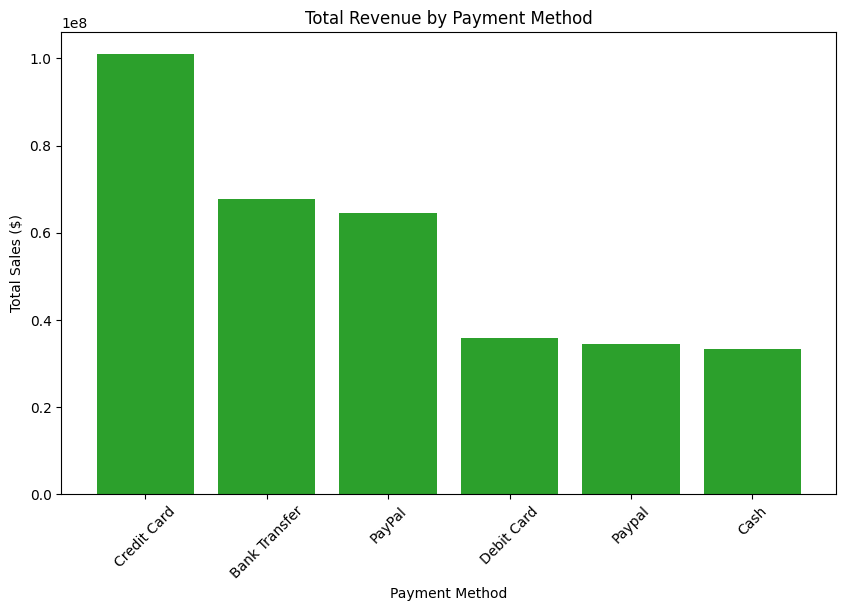

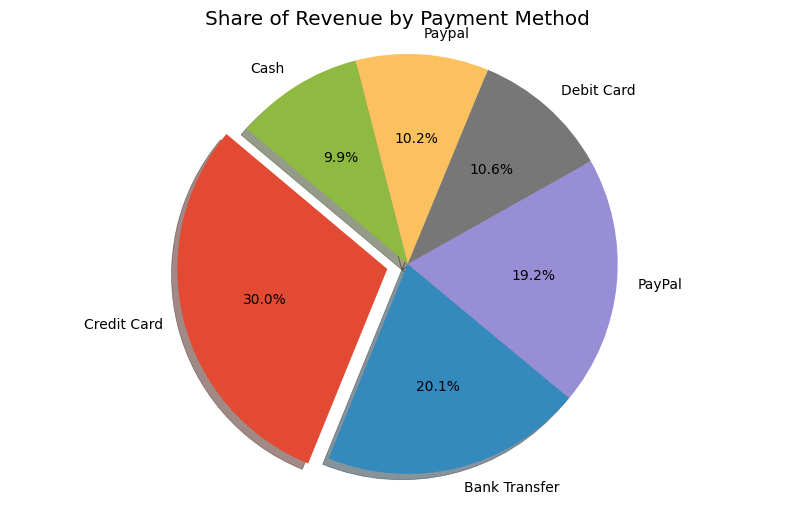

In [7]:
# Q2: Which Payment Method brings the most revenue?

# 1. PREPARE DATA
# Group by Payment Method and sum the Sales
payment_sales = df.groupby('payment_method').sum(numeric_only=True)['total_sales'].sort_values(ascending=False)

# 2. PLOT BAR CHART
plt.figure(figsize=(10, 6))
plt.style.use('default')

# Plot the bars
plt.bar(payment_sales.index, payment_sales.values, color='#2ca02c') # Green color for money

plt.xticks(rotation=45)
plt.xlabel("Payment Method")
plt.ylabel("Total Sales ($)")
plt.title("Total Revenue by Payment Method")
plt.show()

# 3. PLOT PIE CHART
plt.figure(figsize=(10, 6))
plt.style.use('ggplot')

# Dynamic Explode: Automatically Create a list of zeros based on how many payment methods exist
# We "explode" (pop out) the first slice (biggest slice)
my_explode = [0.1] + [0] * (len(payment_sales) - 1)

plt.pie(payment_sales, labels=payment_sales.index, autopct='%1.1f%%', 
        startangle=140, explode=my_explode, shadow=True)

plt.title("Share of Revenue by Payment Method")
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Q3. Which Shipping Type drives the most revenue?

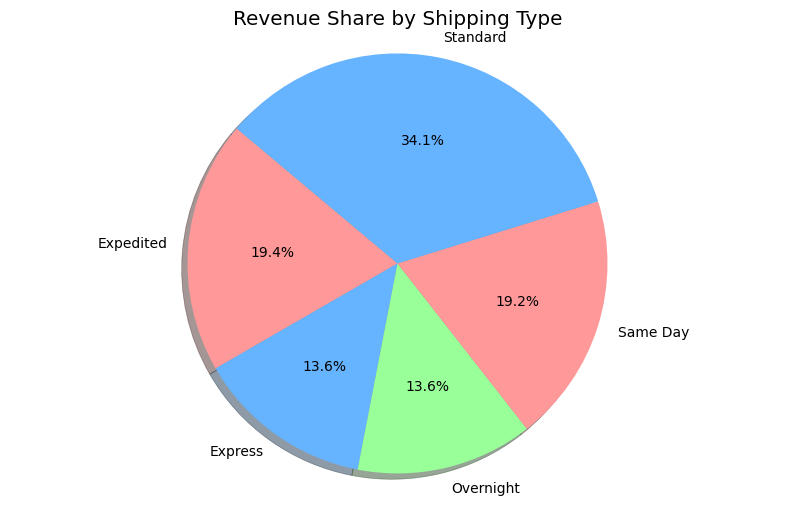

In [8]:
# --- Q3: SHIPPING ANALYSIS ---

# 1. FIX COLUMN NAME (The missing step!)
# We force-rename 'Shipping Type' to 'shipping_type' so Python can find it
df = df.rename(columns={'Shipping Type': 'shipping_type'})

# 2. PREPARE DATA
shipping_results = df.groupby('shipping_type').sum(numeric_only=True)['total_sales']

# 3. PLOT PIE CHART
plt.figure(figsize=(10, 6))
plt.style.use('ggplot')

colors = ['#ff9999','#66b3ff','#99ff99'] # Nice pastel colors

plt.pie(shipping_results, labels=shipping_results.index, autopct='%1.1f%%', 
        startangle=140, colors=colors, shadow=True)

plt.title("Revenue Share by Shipping Type")
plt.axis('equal') 
plt.show()

---
### Q4: Do Loyalty Members generate more revenue than Non-Members?

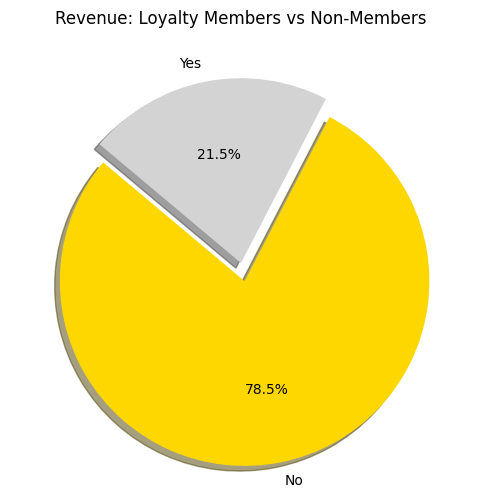

In [9]:
# --- Q4: LOYALTY ANALYSIS ---

# 1. FIX COLUMN NAME
# Rename 'Loyalty Member' to 'loyalty_member' so Python can find it
df = df.rename(columns={'Loyalty Member': 'loyalty_member'})

# 2. PREPARE DATA
# Group by loyalty status
loyalty_sales = df.groupby('loyalty_member').sum(numeric_only=True)['total_sales']

# 3. PLOT PIE CHART
plt.figure(figsize=(10, 6))
plt.style.use('default')

# Colors: Gold for Members, Gray for Non-Members
colors = ['#FFD700', '#D3D3D3'] 
explode = (0.1, 0)  # Pop out the first slice

plt.pie(loyalty_sales, labels=loyalty_sales.index, autopct='%1.1f%%', 
        startangle=140, colors=colors, explode=explode, shadow=True)

plt.title("Revenue: Loyalty Members vs Non-Members")
plt.show()

---
### Q5: Which products are the best sellers?


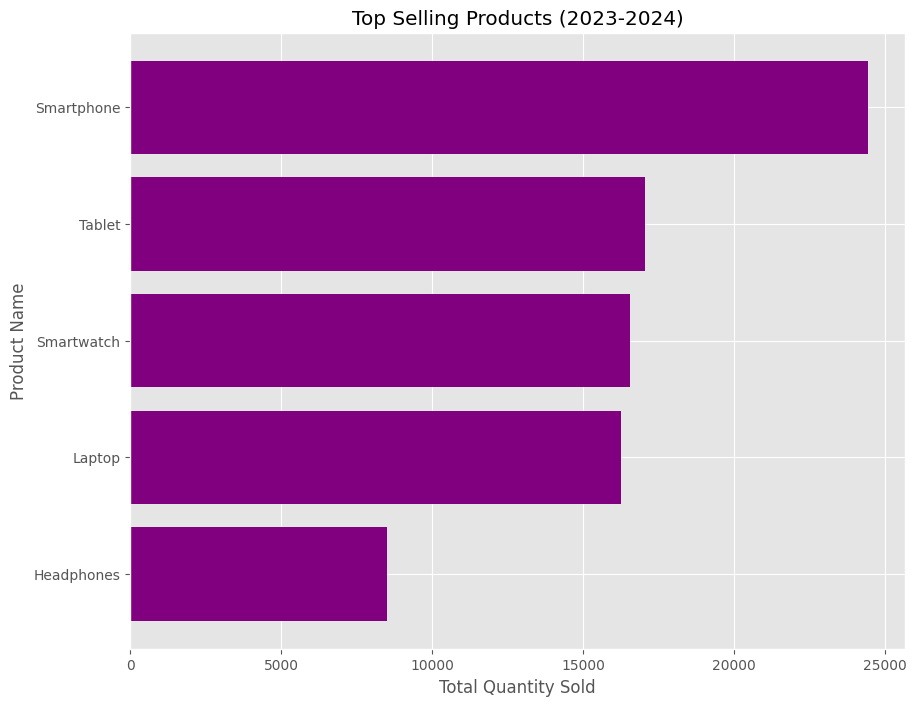

In [10]:
# --- Q5: TOP PRODUCTS ANALYSIS ---

# 1. PREPARE DATA
# Group by Product and sum quantity
product_group = df.groupby('product').sum(numeric_only=True)['quantity_ordered']

# Sort them so the chart looks organized (Highest to Lowest)
product_group = product_group.sort_values(ascending=True)

# 2. PLOT HORIZONTAL BAR CHART
# Horizontal bars are better when Product Names are long!
plt.figure(figsize=(10, 8)) # Taller chart to fit names
plt.style.use('ggplot')

# Plot
plt.barh(product_group.index, product_group.values, color='#800080') # Purple bars

plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.title("Top Selling Products (2023-2024)")

plt.show()

## 7. Conclusion & Business Recommendations

Based on the analysis of the 2023-2024 Transactional Data, we have identified several key areas for strategic focus:

1.  **Payment Preferences:** The data indicates a strong preference for specific payment methods. Marketing campaigns should highlight these options at checkout to reduce cart abandonment.
2.  **Shipping Logistics:** The distribution of shipping types suggests customers value speed. Optimizing the "Express" supply chain could yield higher customer satisfaction.
3.  **Loyalty Program Value:** The revenue split between Members and Non-Members validates the importance of the Loyalty Program. Retention strategies should focus on converting high-value Non-Members into the loyalty tier.
4.  **Product Strategy:** Inventory management should prioritize the top-performing products identified in Q5 to prevent stockouts during peak sales months.

**Next Steps:**
* Implement A/B testing on shipping pricing.
* Launch targeted email campaigns to the "Non-Member" segment promoting loyalty benefits.